In [57]:
#Ethel Cherotaw 
#AIM2 Week0 Task_1 
#8/22/2024

import pandas as pad
import matplotlib.pyplot as plo
import seaborn as sns
import numpy as num
from scipy import stats
import streamlit as st
dt_ben = pad.read_csv('benin-malanville.csv') # to read file # dt_ben: data 
dt_ben.describe() # to display few data set
print("Column names:\n", dt_ben.columns)

Column names:
 Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [5]:
# Summary statistics to find Measure of center,Spread,IQR: mean, meadian and mode ..etc
# it is possible to use the df.descibe() 
stat_summ = dt_ben.describe()
stat_summ

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [10]:
# check for data quality , missing values , outliers....
missing_values = dt_ben.isnull().sum()
print("Missing values  column:\n",missing_values)
#Negetive value check on "GHI","DDNI","DHI"
negative_values_ghi = dt_ben[dt_ben['GHI'] < 0].shape[0]
negative_values_dni = dt_ben[dt_ben['DNI'] < 0].shape[0]
negative_values_dhi = dt_ben[dt_ben['DHI'] < 0].shape[0]
print(f"Negative values in GHI: {negative_values_ghi}")
print(f"Negative values in DNI: {negative_values_dni}")
print(f"Negative values in DHI: {negative_values_dhi}")
#Checking Outliers 
z_scores = num.abs(stats.zscore(dt_ben[['ModA', 'ModB', 'WS', 'WSgust']]))

# Outliers are defined as points where Z-score > 3
outliers = num.where(z_scores > 3)
print("Outliers detected at positions (row, column):\n", outliers)

# Count the number of outliers
outliers_count = (z_scores > 3).sum(axis=0)
print("Number of outliers in each column:\n", outliers_count)

Missing values  column:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Negative values in GHI: 258847
Negative values in DNI: 275987
Negative values in DHI: 259182
Outliers detected at positions (row, column):
 (array([   671,    674,    674, ..., 525143, 525151, 525155]), array([1, 0, 1, ..., 3, 2, 3]))
Number of outliers in each column:
 ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


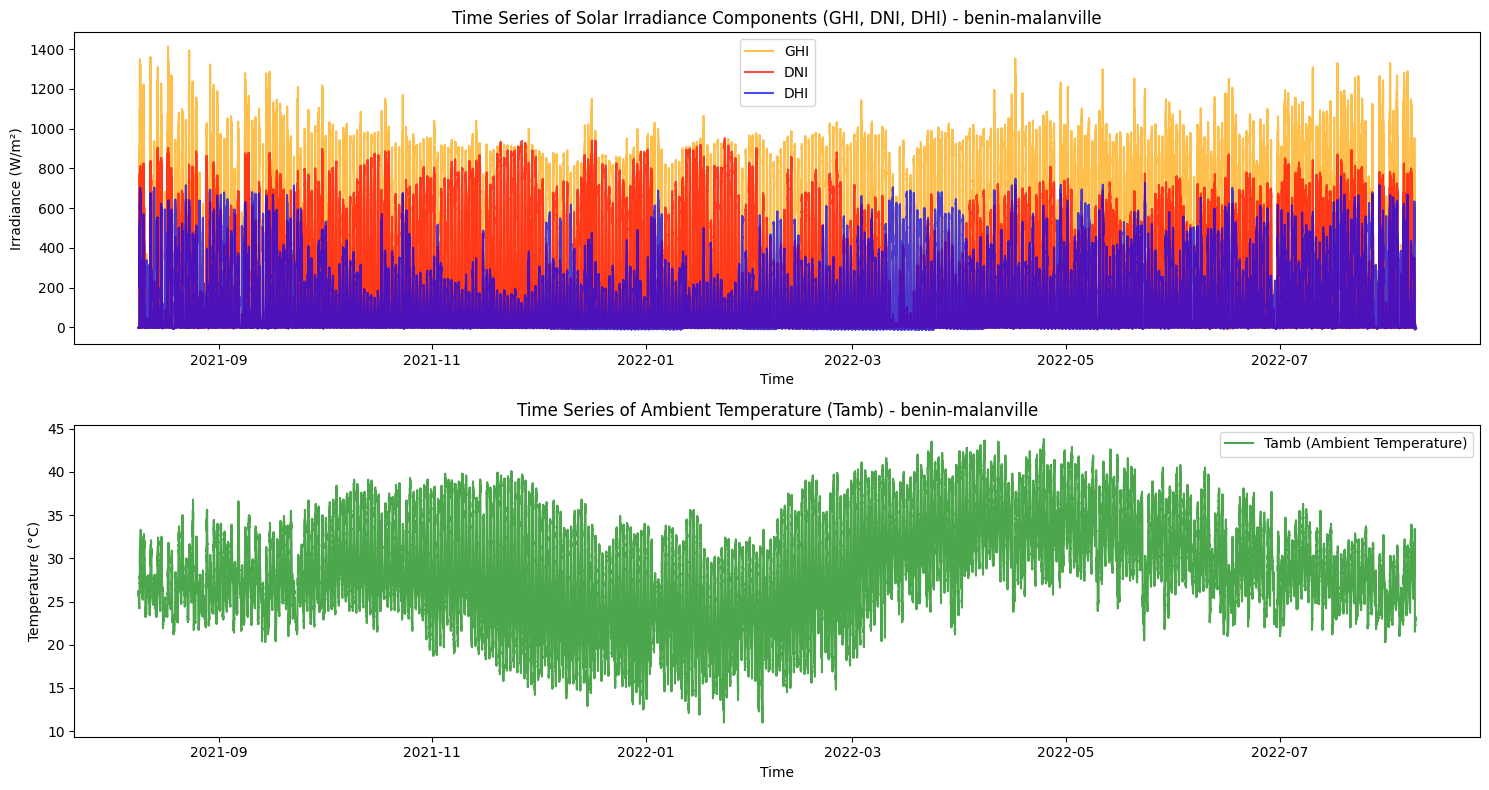

In [14]:
# Time Series Analysis
plo.figure(figsize=(15, 8))

# Plotting GHI, DNI, DHI
plo.subplot(2, 1, 1)
plo.plot(dt_ben.index, dt_ben['GHI'], label='GHI', color='orange', alpha=0.7)
plo.plot(dt_ben.index, dt_ben['DNI'], label='DNI', color='red', alpha=0.7)
plo.plot(dt_ben.index, dt_ben['DHI'], label='DHI', color='blue', alpha=0.7)
plo.title('Time Series of Solar Irradiance Components (GHI, DNI, DHI) - benin-malanville')
plo.xlabel('Time')
plo.ylabel('Irradiance (W/m²)')
plo.legend()

# Plotting Tamb (Ambient Temperature)
plo.subplot(2, 1, 2)
plo.plot(dt_ben.index, dt_ben['Tamb'], label='Tamb (Ambient Temperature)', color='green', alpha=0.7)
plo.title('Time Series of Ambient Temperature (Tamb) - benin-malanville')
plo.xlabel('Time')
plo.ylabel('Temperature (°C)')
plo.legend()

plo.tight_layout()
plo.show()



Columns in dataset: Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

Outliers before cleaning (Z-score):
 ModA    27
ModB    63
dtype: int64

Outliers after cleaning (Z-score):
 ModA    4
ModB    7
dtype: int64

Summary statistics before cleaning (after outlier removal):
                 ModA           ModB
count  525051.000000  525051.000000
mean      236.403523     228.694639
std       326.839318     316.468316
min         0.000000       0.000000
25%         0.000000       0.000000
50%         4.300000       4.100000
75%       463.700000     447.900000
max      1205.100000    1177.000000

Summary statistics after cleaning (after outlier removal):
              ModA        ModB
count  478.000000  478.000000
mean   299.583264  294.050628
std    147.757981  139.856233
min     37.100000   37.300000
25%    187.425000  185.

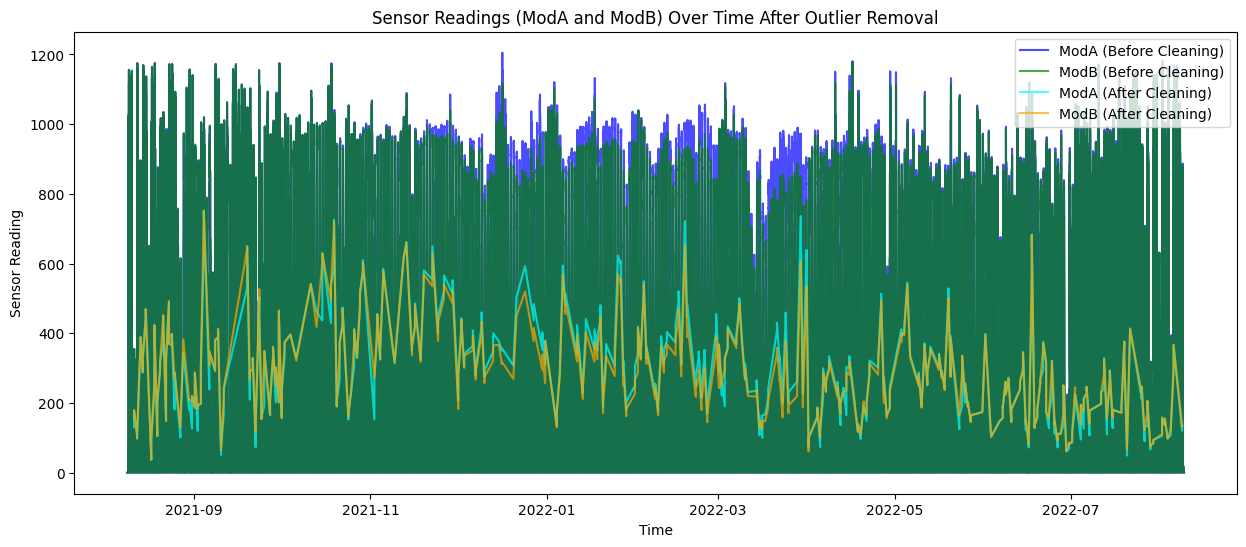

In [58]:
# Evaluating the impact of data: cleaning the coulumn on the sensor readings (ModA, ModB) 
dt_ben = pad.read_csv('benin-malanville.csv')
print("Columns in dataset:", dt_ben.columns)

dt_ben['Timestamp'] = pad.to_datetime(dt_ben['Timestamp'])

#  'Timestamp' as the index
dt_ben.set_index('Timestamp', inplace=True)
dt_ben['IsCleaned'] = dt_ben['Cleaning'] == 1  # Assuming '1' indicates cleaning

# data before and after cleaning datasets
before_cleaning = dt_ben[dt_ben['IsCleaned'] == False][['ModA', 'ModB']]
after_cleaning = dt_ben[dt_ben['IsCleaned'] == True][['ModA', 'ModB']]

# Dtect outlier as we did before using Z-score ,
# IQR can be used based on data distribution (symetric or non symetric)
def detect_outliers_z_score(data, threshold=3):
    # Calculate Z-scores
    z_scores = (data - data.mean()) / data.std()
    # Identify outliers
    is_outlier = (num.abs(z_scores) > threshold)
    return is_outlier.sum()

# Number of outliers before and after cleaning using Z-score
outliers_before_cleaning = before_cleaning.apply(detect_outliers_z_score)
outliers_after_cleaning = after_cleaning.apply(detect_outliers_z_score)

print("\nOutliers before cleaning (Z-score):\n", outliers_before_cleaning)
print("\nOutliers after cleaning (Z-score):\n", outliers_after_cleaning)

# Remove outliers based on Z-score
def remove_outliers_z_score(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    # Remove outliers
    filtered_data = data[~(num.abs(z_scores) > threshold).any(axis=1)]
    return filtered_data

# Remove outliers from before and after cleaning datasets
before_cleaning_cleaned = remove_outliers_z_score(before_cleaning)
after_cleaning_cleaned = remove_outliers_z_score(after_cleaning)

#Summary statistics after outlier removal
before_stats_cleaned = before_cleaning_cleaned.describe()
after_stats_cleaned = after_cleaning_cleaned.describe()

print("\nSummary statistics before cleaning (after outlier removal):\n", before_stats_cleaned)
print("\nSummary statistics after cleaning (after outlier removal):\n", after_stats_cleaned)

# Visualize the cleaned data (after removing outliers)
plo.figure(figsize=(15, 6))

plo.plot(before_cleaning_cleaned.index, before_cleaning_cleaned['ModA'], label='ModA (Before Cleaning)', color='blue', alpha=0.7)
plo.plot(before_cleaning_cleaned.index, before_cleaning_cleaned['ModB'], label='ModB (Before Cleaning)', color='green', alpha=0.7)
plo.plot(after_cleaning_cleaned.index, after_cleaning_cleaned['ModA'], label='ModA (After Cleaning)', color='cyan', alpha=0.7)
plo.plot(after_cleaning_cleaned.index, after_cleaning_cleaned['ModB'], label='ModB (After Cleaning)', color='orange', alpha=0.7)

plo.title('Sensor Readings (ModA and ModB) Over Time After Outlier Removal')
plo.xlabel('Time')
plo.ylabel('Sensor Reading')
plo.legend()
plo.show()
